#### __2. 실습 환경 설정과 파이토치 기초__

__2.2 파이토치 기초 문법__

In [1]:
# 텐서 생성 및 변환
import torch
print(torch.tensor([[1, 2], [3, 4]]))
print(torch.tensor([[1, 2], [3, 4]], device="cuda:0"))  # GPU에 텐서 생성
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64))

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
temp = torch.tensor([[1, 2], [3, 4]])
print(temp.numpy())  # 텐서를 ndarray로 변환

[[1 2]
 [3 4]]


In [3]:
temp = torch.tensor([[1, 2], [3, 4]], device="cuda:0")
print(temp.to("cpu").numpy())  # GPU상의 텐서를 CPU의 텐서로 변환 후 ndarray로 변환

[[1 2]
 [3 4]]


In [4]:
# 인덱스 조작
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7])
print(temp[0], temp[1], temp[-1])
print(temp[2:5], temp[4:-1])

tensor(1.) tensor(2.) tensor(7.)
tensor([3., 4., 5.]) tensor([5., 6.])


In [5]:
# 텐서 연산 및 차원 조작
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])
print(w - v)

tensor([2, 2, 3])


In [6]:
temp = torch.tensor([
    [1, 2], [3, 4]])

print(temp.shape)

torch.Size([2, 2])


In [7]:
print(temp.view(4, 1))  # 2x2행렬을 4x1로 변형

tensor([[1],
        [2],
        [3],
        [4]])


In [8]:
print(temp.view(-1))  # 2x2행렬을 1차원 벡터로 변형

tensor([1, 2, 3, 4])


In [9]:
print(temp.view(1, -1))  # -1은 (1, ?)와 같은 의미, 다른 차원으로부터 값을 유추

tensor([[1, 2, 3, 4]])


In [10]:
# 데이터 준비
import torchvision.transforms as transforms

mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))  
])  # 평균이 0.5, 표준편차가 1.0이 되도록 데이터의 분포 조정

In [11]:
from torchvision.datasets import MNIST
import requests
download_root = "data/MNIST_DATASET"

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)

In [12]:
# 모델 정의
# 단순 신경망을 정의
model = torch.nn.Linear(in_features=1, out_features=1, bias=True)

# nn.Module()을 상속하여 정의
class MLP(torch.nn.Module):
    def __init__(self, inputs):
        super(MLP, self).__init__()
        self.layer = torch.nn.Linear(inputs, 1)  # 계층 정의
        self.activation = torch.nn.Sigmoid()  # 활성화 함수 정의
    
    def forward(self, X):
        X = self.layer(X)
        X = self.activation(X)
        return X

In [13]:
# Sequential 신경망을 정의하는 방법
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(2))
        
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5),
            torch.nn.ReLU(inplace=True),
            torch.nn.MaxPool2d(2))
        
        self.layer3 = torch.nn.Sequential(
            torch.nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            torch.nn.ReLU(inplace=True))
        
        def forward(self, x):
            x = self.layer1(x)
            x = self.layer2(x)
            x = x.view(x.shape[0], -1)
            x = self.layer3(x)
            return x

model = MLP()  # 모델에 대한 객체 생성

print("Printing children\n--------------------")
print(list(model.children()))
print("\n\nPrinting Modules\n--------------------")
print(list(model.modules()))


Printing children
--------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


Printing Modules
--------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=750, o

In [14]:
# 함수로 정의하는 방법
def MLP(in_features=1, hidden_features=20, out_features=1):
    hidden = torch.nn.Linear(in_features=in_features, out_features=hidden_features,
                             bias=True)
    activation = torch.nn.ReLU()
    output = torch.nn.Linear(in_features=hidden_features, out_features=out_features,
                             bias=True)
    net = torch.nn.Sequential(hidden, activation, output)
    return net

__2.4 파이토치 코드 맛보기__

In [15]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
dataset = pd.read_csv("data/car_evaluation.csv")
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


<AxesSubplot:ylabel='output'>

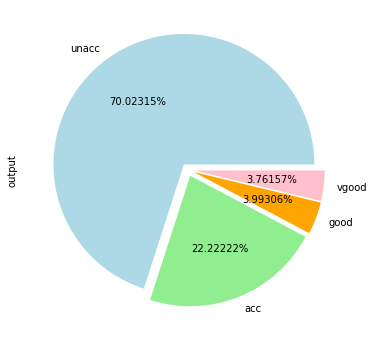

In [17]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size
dataset.output.value_counts().plot(kind="pie", autopct="%0.05f%%",
                                   colors=["lightblue", "lightgreen", "orange", "pink"], 
                                   explode=(0.05, 0.05, 0.05, 0.05))

In [18]:
categorical_columns = ["price", "maint", "doors", "persons", "lug_capacity", "safety"]

for category in categorical_columns:
    dataset[category] = dataset[category].astype("category")  # 범주형으로 변환

price = dataset["price"].cat.codes.values  # 범주형 데이터(단어)를 숫자(넘파이 배열)로 변환
maint = dataset["maint"].cat.codes.values
doors = dataset["doors"].cat.codes.values
persons = dataset["persons"].cat.codes.values
lug_capacity = dataset["lug_capacity"].cat.codes.values
safety = dataset["safety"].cat.codes.values

categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [19]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)  # 배열을 텐서로 변환
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

In [20]:
# 레이블을 텐서로 변환
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()  # 1차원 텐서로 변환

print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


In [21]:
# 범주형 칼럼을 N차원으로 변환
categorical_column_sizes = [len(dataset[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size + 1) // 2)) for col_size in categorical_column_sizes]

print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


In [22]:
# 데이터셋 분리
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records - test_records]
categorical_test_data = categorical_data[total_records - test_records:total_records]
train_outputs = outputs[:total_records - test_records]
test_outputs = outputs[total_records - test_records:total_records]

In [23]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


In [24]:
# 모델 네트워크 생성
class Model(nn.Module):
    def __init__(self, embedding_size, output_size, layers, p=0.4):
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))
        self.layers = nn.Sequential(*all_layers)
    
    def forward(self, x_categorical):
        embeddings = []
        for i, e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)
        x = self.layers(x)
        return x

In [25]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


In [26]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='cuda')

In [28]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data).to(device)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i % 25 == 1:
        print(f"Epoch: {i:3} loss: {single_loss.item():10.8f}")
    
    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f"Epoch: {i:3} loss: {single_loss.item():10.10f}")

Epoch:   1 loss: 1.54002655
Epoch:  26 loss: 1.37170398
Epoch:  51 loss: 1.28424585
Epoch:  76 loss: 1.19316602
Epoch: 101 loss: 1.05168152
Epoch: 126 loss: 0.93983930
Epoch: 151 loss: 0.80695623
Epoch: 176 loss: 0.72091591
Epoch: 201 loss: 0.66811591
Epoch: 226 loss: 0.64628977
Epoch: 251 loss: 0.63043487
Epoch: 276 loss: 0.61586303
Epoch: 301 loss: 0.60364187
Epoch: 326 loss: 0.59371829
Epoch: 351 loss: 0.58285266
Epoch: 376 loss: 0.58573198
Epoch: 401 loss: 0.57819986
Epoch: 426 loss: 0.57653129
Epoch: 451 loss: 0.56455606
Epoch: 476 loss: 0.56346589
Epoch: 500 loss: 0.5678018928


In [50]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)
with torch.no_grad():
    y_val = model(categorical_test_data).to(device=device)
    loss = loss_function(y_val, test_outputs)
print(f"Loss: {loss:8f}")

Loss: 0.566745


In [55]:
y_val = y_val.to(device="cpu")
y_val[:5]

tensor([[ 1.7197,  0.6286, -2.9266, -2.6993],
        [ 2.2521,  1.2444, -3.3200, -3.3796],
        [ 2.6224,  2.0241, -3.5857, -3.9937],
        [ 2.7795,  0.8785, -3.3335, -2.9139],
        [ 2.1812,  0.9910, -3.1051, -3.1545]])

In [56]:
y_val = np.argmax(y_val, axis=1)
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_outputs = test_outputs.to(device="cpu")
print(confusion_matrix(test_outputs, y_val))
print(classification_report(test_outputs, y_val))
print(accuracy_score(test_outputs, y_val))

[[258   1]
 [ 85   1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       259
           1       0.50      0.01      0.02        86

    accuracy                           0.75       345
   macro avg       0.63      0.50      0.44       345
weighted avg       0.69      0.75      0.65       345

0.7507246376811594
